<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [20]:
def sum_prod(X, V):
    return np.array(sum(X[i].dot(V[i]) for i in range( len(X))))

def tests():
    X = [np.array([1, 2]), np.array([3, 4]), np.array([5, 6])]
    V = [np.array([2, 3]), np.array([4, 5]), np.array([6, 7])]
    res = sum_prod(X, V)
    answer = np.array([8, 32, 68])
    assert np.array_equal(res, answer) == True
    
    X = [np.array([2, 3, 4]), np.array([1, 2, 1])]
    V = [np.array([1, 2, 1]), np.array([2, 3, 0])]
    res = sum_prod(X, V)
    answer = np.array([12, 8])
    assert np.array_equal(res, answer) == True

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [21]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold,1,0)

def test_binarize():
    M = np.array([[0.1, 0.6, 0.3],
                  [0.8, 0.4, 0.7],
                  [0.2, 0.9, 0.5]])
    
    threshold = 0.5
    binarized_M = binarize(M, threshold)
    
    expected_result = np.array([[0, 1, 0],
                                [1, 0, 1],
                                [0, 1, 0]])
    
    assert np.array_equal(binarized_M, expected_result)
    
test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [27]:
def unique_rows(mat):
    res=""
    for i in mat:
        res += str(set(i))
    return res

def unique_columns(mat):
    res=""
    for i in mat.T:
        res += str(set(i))
    return res

def unique_rows_tests():
    mat = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [1, 2, 3]])
    
    assert unique_rows(mat) == "{1, 2, 3}{4, 5, 6}{1, 2, 3}"

def unique_columns_tests():
    mat = np.array([[0,0,1],
                    [2,3,4],
                    [1,0,0]])
    
    assert unique_columns(mat) == "{0, 1, 2}{0, 3}{0, 1, 4}"

unique_rows_tests()
unique_columns_tests()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

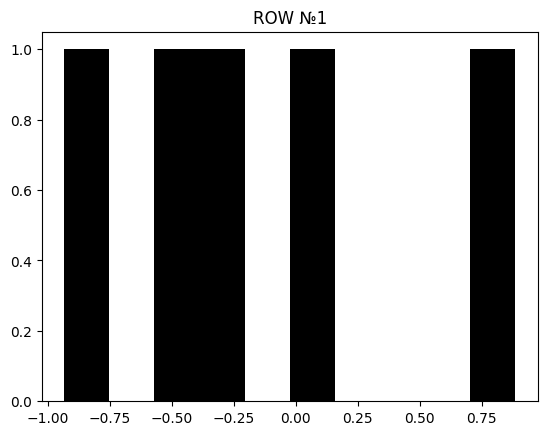

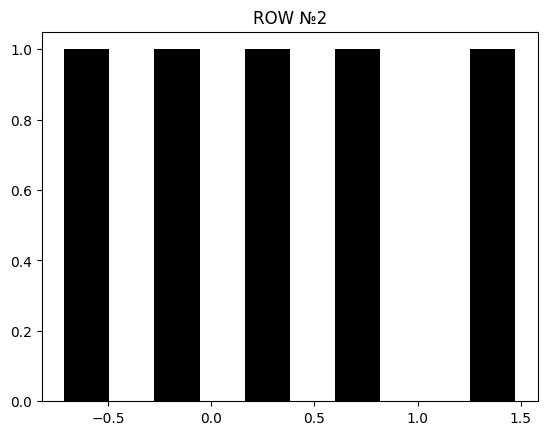

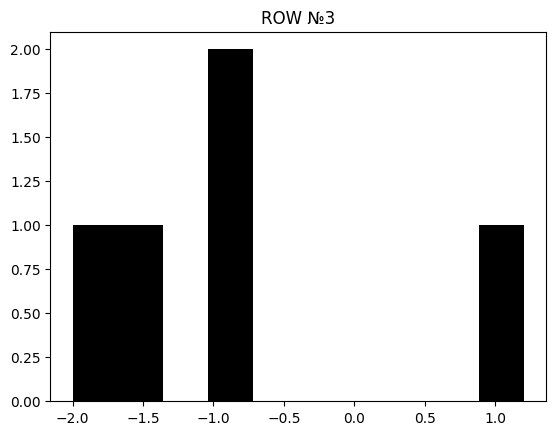

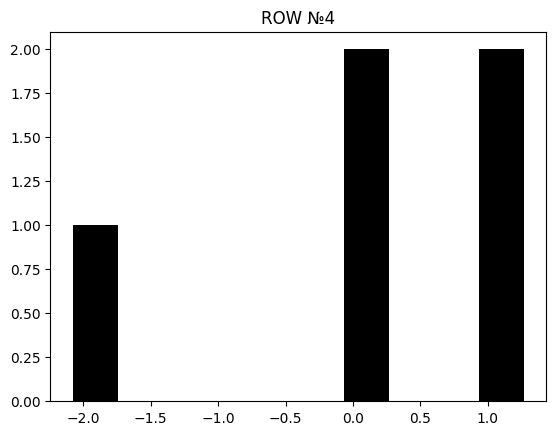

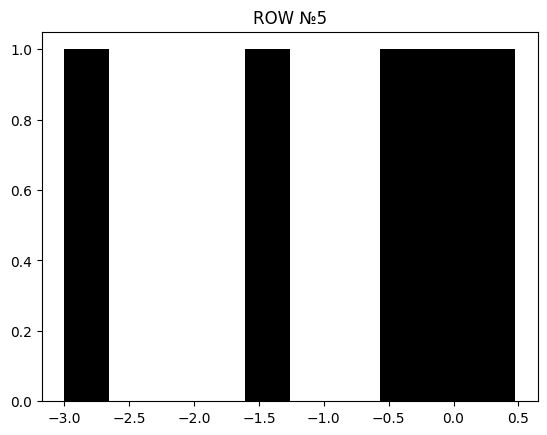

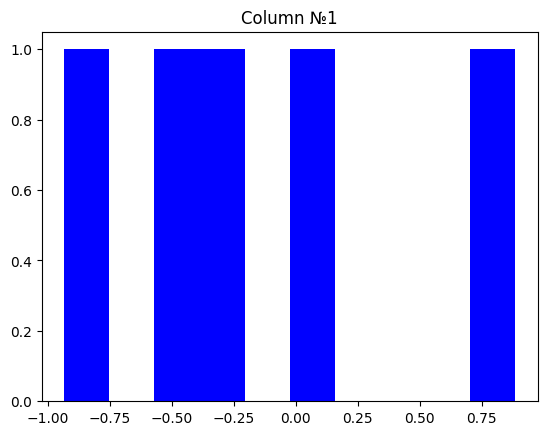

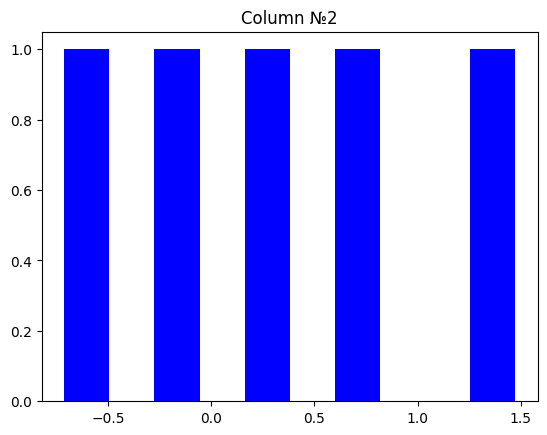

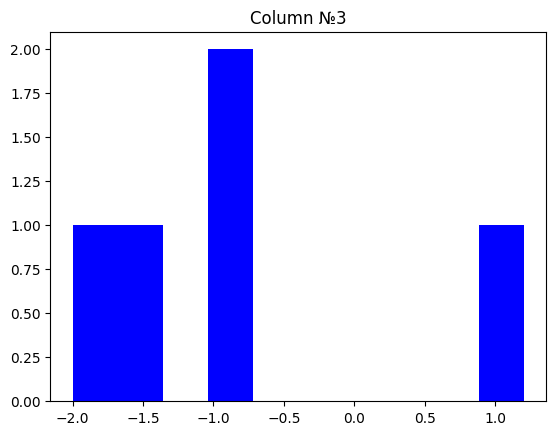

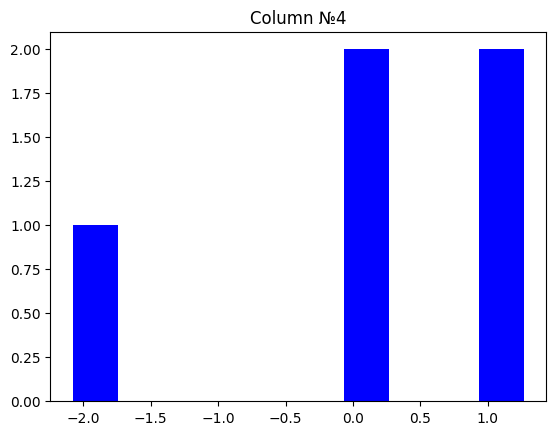

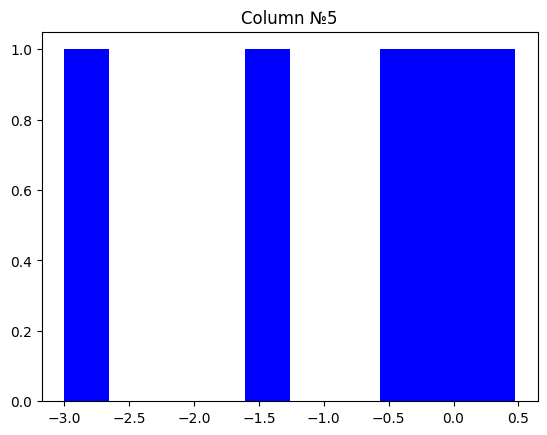

Матрица: [[-0.38535847  0.88489364  0.09781124 -0.56917626 -0.93368238]
 [-0.20813922  0.21209401  1.47315931  0.77287902 -0.71299476]
 [-1.99676043  1.20286705 -1.59002342 -0.88440114 -0.88572688]
 [-2.07661048  0.16269645  1.26739917  0.02324666  1.181428  ]
 [-0.14196818  0.47494506 -0.44896604 -1.32185941 -2.99958906]]

Мат. ожидание для строк: [-0.18110244  0.30739967 -0.83080896  0.11163196 -0.88748753]

Дисперсия для строк: [0.39456777 0.57834697 1.21551513 1.45581719 1.45079491]

Мат. ожидание для столбцов: [-0.96176735  0.58749924  0.15987605 -0.39586223 -0.87011302]

Дисперсия для столбцов: [0.77727182 0.16023518 1.27760185 0.53355743 1.75449195]



In [28]:
def fill_matrix(m, n):
    matrix = np.random.randn(m, n)
    
    row_mean = np.mean(matrix, axis=1)
    row_var = np.var(matrix, axis=1)
    col_mean = np.mean(matrix, axis=0)
    col_var = np.var(matrix, axis=0)
    
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i], color = "black")
        plt.title(f"ROW №{i+1}")
        plt.show()

    for i in range(n):
        plt.figure()
        plt.hist(matrix[i], color = "blue")
        plt.title(f"Column №{i+1}")
        plt.show()

    return matrix, row_mean, row_var, col_mean, col_var

matrix, row_mean, row_var, col_mean, col_var = fill_matrix(5, 5)
    
print(f"Рандомная матрица: {matrix}\n")
print(f"Мат.ожидание для строк: {row_mean}\n")
print(f"Дисперсия для строк: {row_var}\n")
print(f"Мат.ожидание для столбцов: {col_mean}\n")
print(f"Дисперсия для столбцов: {col_var}\n")

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [31]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)

    for idx, x in np.ndenumerate(matrix):
        matrix[idx] = b if sum(idx) % 2 else a

    return matrix

def сhess_tests():
    m = 3
    n = 4
    a = 1
    b = 0
    result = chess(m, n, a, b)
    assert np.array_equal(result, np.array([[1, 0, 1, 0],
                                            [0, 1, 0, 1],
                                            [1, 0, 1, 0]]))
    
    m = 2
    n = 2
    a = 9
    b = 3
    result = chess(m, n, a, b)
    assert np.array_equal(result, np.array([[9, 3],
                                            [3, 9]]))

сhess_tests()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

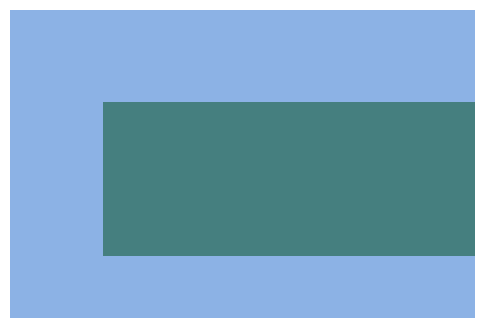

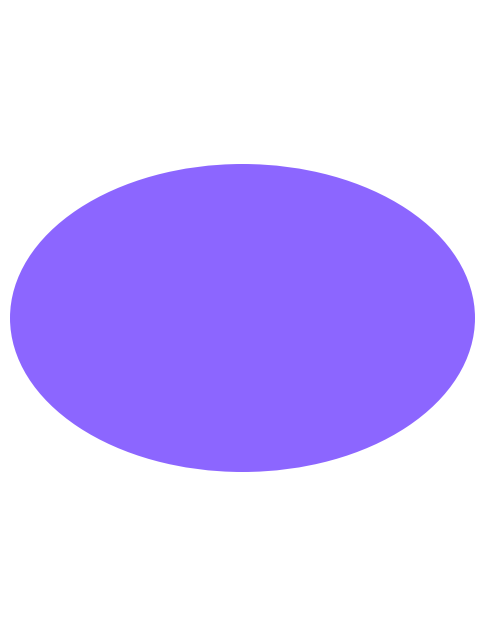

In [50]:
import matplotlib.patches as patches

def draw_rectangle(m, n, a, b, bg_color, rect_color):
    fig, ax = plt.subplots(figsize=(m, n))

    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.add_patch(patches.Rectangle((0, 0), m, n, facecolor=bg_color))

    rectangle = patches.Rectangle((m/5, n/5), a, b, facecolor=rect_color)
    ax.add_patch(rectangle)

    plt.axis('off')
    plt.show()

def draw_ellipse(m, n, a, b, bg_color, ellipse_color):
    fig, ax = plt.subplots(figsize=(m, n))

    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.add_patch(patches.Rectangle((0, 0), m, n, facecolor=bg_color))

    ellipse = patches.Ellipse((m/2, n/2), 2*a, 2*b, angle=0, facecolor=ellipse_color)
    ax.add_patch(ellipse)

    plt.axis('off')
    plt.show()

draw_rectangle(6, 4, 5, 2, (0.1, 0.4, 0.8, 0.5), (0, 0.3, 0.1, 0.5))
draw_ellipse(6, 8, 3, 2, (0, 0, 0, 0), (0.55, 0.4, 1, 1))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [51]:
def TimeSeriesAnalysis(ts, p):

    mean = np.mean(ts)
    var = np.var(ts)
    std = np.std(ts)

    localMin = []
    localMax = []
    for i in range(1, len(ts) - 1):
        if  ts[i - 1] > ts[i] and ts[i] < ts[i + 1]:
            localMin.append(ts[i])
        if ts[i - 1] < ts[i] and ts[i] > ts[i + 1]:
            localMax.append(ts[i])

    smoothedSeries = np.convolve(ts, np.ones(p), mode='valid') / p

    return mean, var, std, localMax, localMin, smoothedSeries

ts = np.array([1,2,3,4,3,2,5,6,8,3])
print(f"ts: {ts}")

mean, var, std, localMax, localMin, smoothedSeries = TimeSeriesAnalysis(ts, 4)

print(f"Мат.ожидание: {mean}")
print(f"Дисперсия: {var}")
print(f"СКО: {std}")
print(f"Локальные максимумы:: {localMax}")
print(f"Локальные минимумы: {localMin}")
print(f"Метод скользящего среднего: {smoothedSeries}")

ts: [1 2 3 4 3 2 5 6 8 3]
Мат.ожидание: 3.7
Дисперсия: 4.01
СКО: 2.0024984394500787
Локальные максимумы:: [4, 8]
Локальные минимумы: [2]
Smoothed series: [2.5  3.   3.   3.5  4.   5.25 5.5 ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [54]:
def one_hot_encoding(labels):
    return np.eye(len(labels), dtype=int)[labels]

print(one_hot_encoding([0,2,3,0]))
print(one_hot_encoding([1,1,1,1]))

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]
